# PSM for ice core d18O

In this tutorial, we introduce the PSM for ice core d18O in `cfr`.

In [1]:
%load_ext autoreload
%autoreload 2

import cfr
print(cfr.__version__)

0.6.0


## Data preparation

### Proxy

In [2]:
pdb = cfr.ProxyDatabase().fetch('PAGES2kv2')

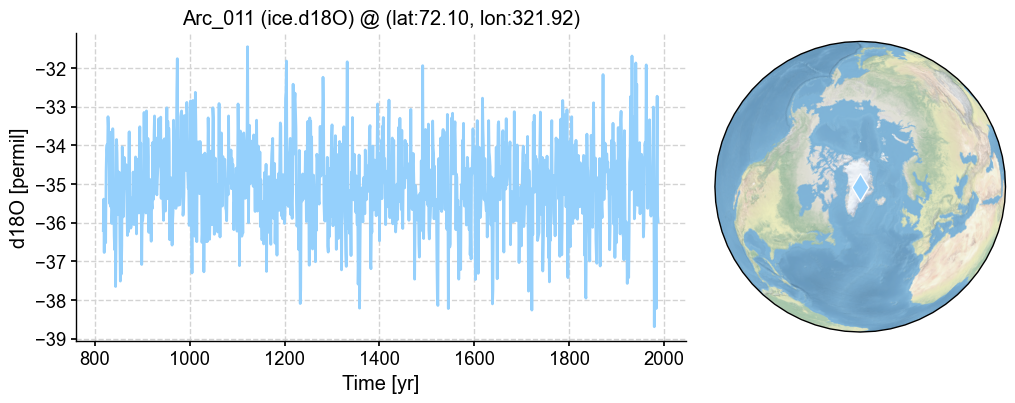

In [3]:
pobj = pdb.records['Arc_011']
fig, ax = pobj.plot()

### Model

In [4]:
%%time

model_tas = cfr.ClimateField().fetch('iCESM_past1000historical/tas')
model_pr = cfr.ClimateField().fetch('iCESM_past1000historical/pr')
model_psl = cfr.ClimateField().fetch('iCESM_past1000historical/psl')
model_d18O = cfr.ClimateField().fetch('iCESM_past1000historical/d18O')

>>> The target file seems existed at: ./data/tas_sfc_Amon_iCESM_past1000historical_085001-200512.nc . Loading from it instead of downloading ...
>>> The target file seems existed at: ./data/pr_sfc_Amon_iCESM_past1000historical_085001-200512.nc . Loading from it instead of downloading ...
>>> The target file seems existed at: ./data/psl_sfc_Amon_iCESM_past1000historical_085001-200512.nc . Loading from it instead of downloading ...
>>> The target file seems existed at: ./data/d18O_sfc_Amon_iCESM_past1000historical_085001-200512.nc . Loading from it instead of downloading ...
CPU times: user 105 ms, sys: 14.1 ms, total: 119 ms
Wall time: 130 ms


## Get climate data for a specific `ProxyRecord`

In [5]:
%%time

pobj.del_clim()
pobj.get_clim(model_tas, tag='model')
pobj.get_clim(model_pr, tag='model')
pobj.get_clim(model_psl, tag='model')
pobj.get_clim(model_d18O, tag='model')

CPU times: user 11.9 ms, sys: 299 ms, total: 311 ms
Wall time: 3.47 s


In [7]:
pobj.clim['model.d18O'].da

<xarray.DataArray 'd18O' (time: 13872)>
array([-24.155558, -30.799866, -27.157188, ..., -27.73261 , -28.163136,
       -29.739498], dtype=float32)
Coordinates:
  * time     (time) object 0850-01-17 00:00:00 ... 2005-12-17 00:00:00
    lat      float32 72.95
    lon      float32 322.5
Attributes:
    long_name:  Ratio of the total mass precip rate H2O
    units:      permil

## Create a PSM object

In [8]:
mdl = cfr.psm.Ice_d18O(pobj)

In [11]:
%%time
pp = mdl.forward(nproc=1)

100%|██████████| 10602/10602 [00:03<00:00, 3000.93it/s]

CPU times: user 3.51 s, sys: 1.37 s, total: 4.87 s
Wall time: 4.88 s


In [12]:
%%time
pp = mdl.forward()

CPU times: user 1.39 s, sys: 342 ms, total: 1.73 s
Wall time: 1.8 s


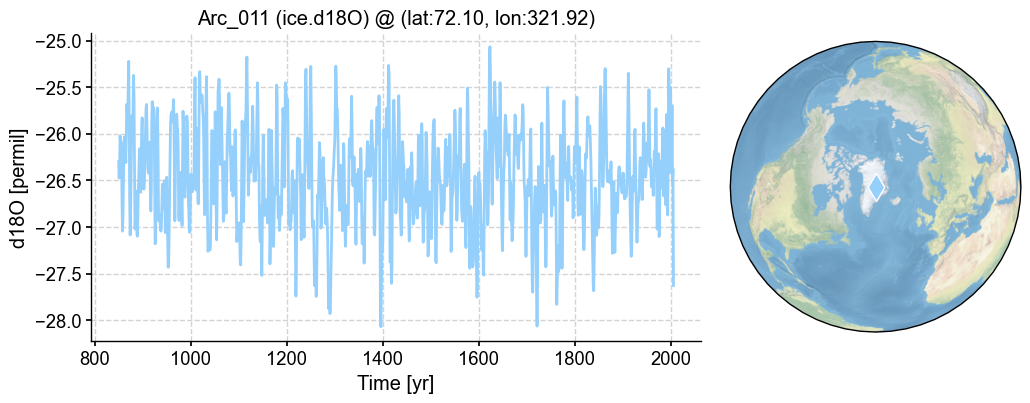

In [13]:
fig, ax = pp.plot()